## Logistic Regression from Scratch

In [48]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

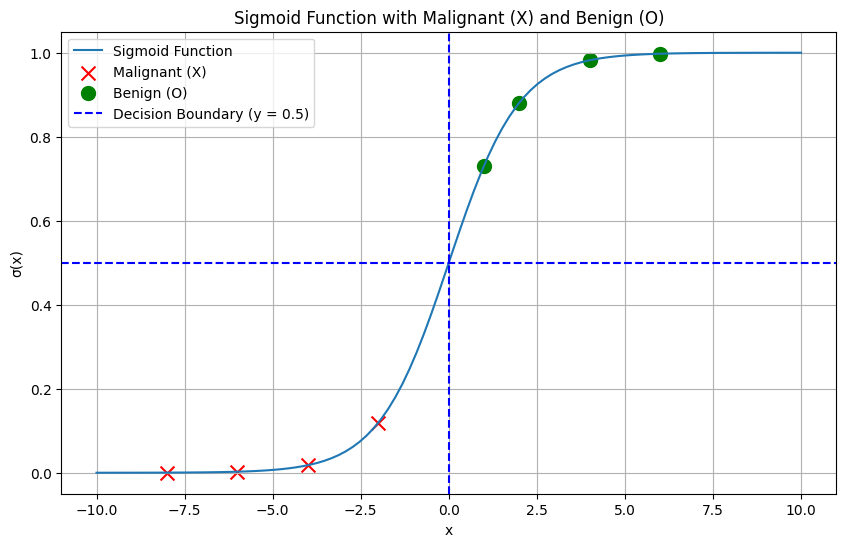

In [3]:
# Generate values for x
x = np.linspace(-10, 10, 100)

print(x)

# Generate sigmoid values for y
y = sigmoid(x)

# Create some threshold points to represent malignant and benign
malignant_x = [-8, -6, -4, -2]
benign_o = [1, 2, 4, 6]

# Plot the sigmoid curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Sigmoid Function")

# Plot malignant points (X) and benign points (O)
plt.scatter(malignant_x, sigmoid(np.array(malignant_x)), color='red', marker='x', label="Malignant (X)", s=100)
plt.scatter(benign_o, sigmoid(np.array(benign_o)), color='green', marker='o', label="Benign (O)", s=100)

# Add the decision boundary where y = 0.5
plt.axhline(0.5, color='blue', linestyle='--', label="Decision Boundary (y = 0.5)")
plt.axvline(0,color='blue', linestyle='--')

# Labels and legend
plt.title("Sigmoid Function with Malignant (X) and Benign (O)")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Cost Function for Logistic Regression
# J(w, b) = 1 / m * SUM for i in range(m) L(f_w_b(x[i]), y[i]) 
# where L = -y[i] * log(f_w_b(x[i])) - (1 - y[i]) * log(1 - f_w_b(x[i]))

In [4]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


In [5]:
def plot_data(X, y, ax):
    # Plot "X" for class 0 and "O" for class 1
    ax.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', color='blue', s=100, label='Benign')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', color='red', s=100, label='Malignant')

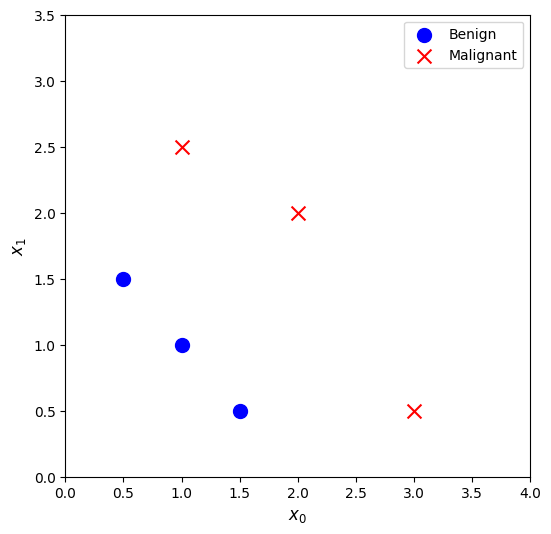

In [6]:
# Sample data
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.legend()  
plt.show()

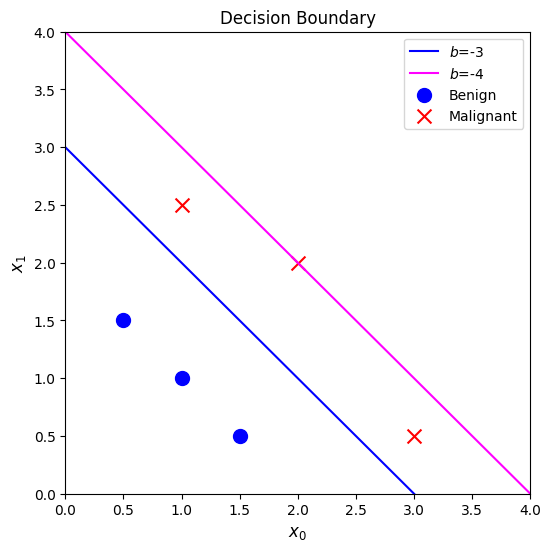

In [7]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(6,6))
# Plot the decision boundary
ax.plot(x0, x1, c='blue', label="$b$=-3")
ax.plot(x0, x1_other, c='magenta', label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [8]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


In [9]:
def compute_gradient_logistic(X, y, w, b): 
    m, n = X.shape
    dj_dw = np.zeros((n,)) 
    dj_db = 0.0  

    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z)
        err_i = f_wb_i - y[i]        
        dj_dw += err_i * X[i]
        dj_db += err_i  

    dj_dw /= m
    dj_db /= m 

    return dj_db, dj_dw

In [10]:
def compute_gradient_logistic_vectorized(x, y, w, b):
    m = x.shape[0]
    z = np.dot(x, w) + b
    f_w_b = 1 / (1 + np.exp(-z))
    error = f_w_b - y
    dj_dw = (1/m) * np.dot(x.T, error)
    dj_db = (1/m) * np.sum(error) 

    return dj_dw, dj_db

In [11]:
def perform_gradient_descent(x, y, w_init, b_init, aplha, num_iters):
    w = w_init
    b = b_init
    J_History = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic_vectorized(x, y, w, b)
        w = w - (aplha * dj_dw)
        b = b - (aplha * dj_db)
        
        if i < 100000:
            cost = compute_cost_logistic(x, y, w, b)
            J_History.append(cost)
            
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_History[-1]}")
        

    return w, b, J_History

In [12]:
X_tmp = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [13]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, history = perform_gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574
Iteration 1000: Cost 0.1590977666870457
Iteration 2000: Cost 0.08460064176930082
Iteration 3000: Cost 0.05705327279402531
Iteration 4000: Cost 0.04290759421682
Iteration 5000: Cost 0.03433847729884557
Iteration 6000: Cost 0.02860379802212006
Iteration 7000: Cost 0.02450156960879306
Iteration 8000: Cost 0.02142370332569289
Iteration 9000: Cost 0.019030137124109094

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019839


In [ ]:
plt.plot(history)

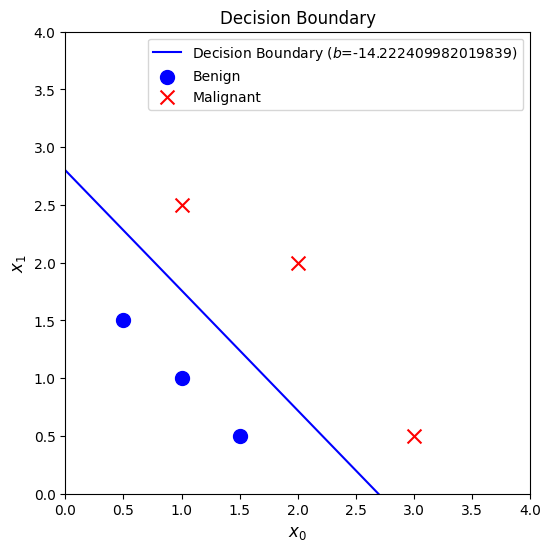

In [14]:
# Choose values between 0 and 4 for x0
x0 = np.linspace(0, 4, 100)

# Decision boundary from logistic regression model
x1_decision_boundary = -(w_out[0] * x0 + b_out) / w_out[1]

# Plot the decision boundary
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x0, x1_decision_boundary, c='blue', label=f"Decision Boundary ($b$={b_out})")


# Plot the original data
plot_data(X_train, y_train, ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

## Logistic regression using scikit-learn

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [28]:
lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

In [29]:
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


In [30]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0


## Cost function for linear regression with regularization

In [20]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    m = X_tmp.shape[0]
    n = len(w)

    # Compute Cost
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i]) ** 2
    cost /= (2 * m)

    # Compute Regularized Cost
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j] ** 2)
    reg_cost *= (lambda_ / (2 * m))

    total_cost = cost + reg_cost

    return total_cost

In [22]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214277


## Cost function for logistic regression with regularization

In [42]:
def compute_cost_logistic_reg(X, y, w, b, lambda_=1):
    m = X.shape[0]
    n = len(w)

    # Compute Cost
    cost = 0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += - y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    cost /= m

    # Compute Regularized Cost
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j] ** 2)
    reg_cost *= (lambda_ / (2 * m))

    total_cost = cost + reg_cost

    return total_cost

In [43]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


## Gradient function for regularized linear regression

In [44]:
def compute_gradient_linear_reg(X, y, w, b, lambda_): 
    m, n = X.shape
    dj_dw = np.zeros((n,)) 
    dj_db = 0.0  

    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        err_i = f_wb_i - y[i]        
        dj_dw += err_i * X[i]
        dj_db += err_i  

    dj_dw /= m
    dj_db /= m 

    for j in range(n):
        dj_dw[j] += (lambda_ / m) * w[j]

    return dj_db, dj_dw

In [45]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


## Gradient function for regularized logistic regression

In [46]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    m, n = X.shape
    dj_dw = np.zeros((n,)) 
    dj_db = 0.0  

    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z)
        err_i = f_wb_i - y[i]        
        dj_dw += err_i * X[i]
        dj_db += err_i  

    dj_dw /= m
    dj_db /= m 

    for j in range(n):
        dj_dw[j] += (lambda_ / m) * w[j]

    return dj_db, dj_dw

In [47]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]
